In [1]:
# import packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# read dataset
df = pd.read_csv('data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
len(df)

11914

In [4]:
# change columns to lower case and replace space with underscore
df.columns = df.columns.str.lower().str.replace(' ','_')

In [5]:
string_columns = list(df.dtypes[df.dtypes =="object"].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [6]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


<AxesSubplot:xlabel='msrp', ylabel='Count'>

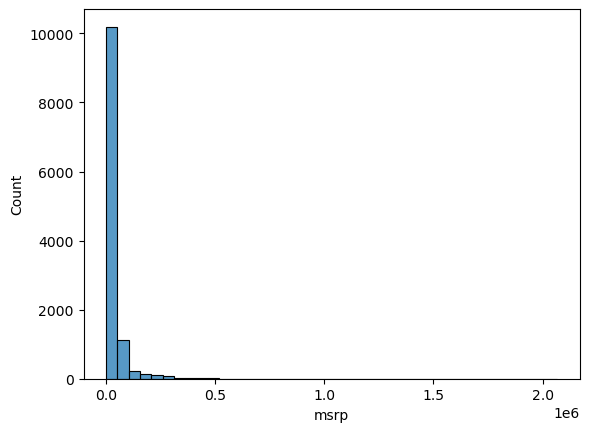

In [7]:
sns.histplot(df.msrp, bins=40)

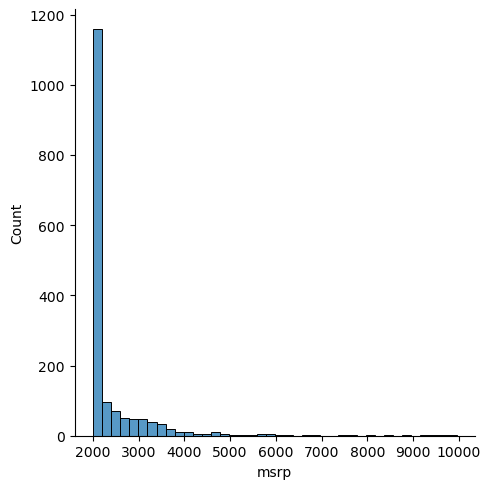

In [8]:
sns.displot(df.msrp[df.msrp < 10000], bins=40)

In [9]:
# transform the target variable
log_price = np.log1p(df.msrp)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

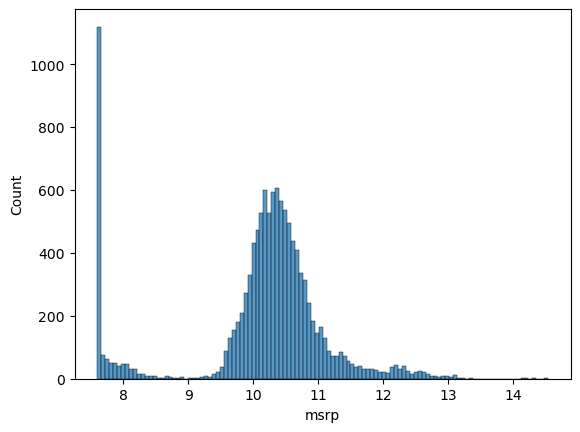

In [10]:
sns.histplot(log_price)

In [11]:
# check for missing value
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [12]:
# splitting data into validation, test, and training set

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)


np.random.seed(2) # ensures the the results are reproducible

idx = np.arange(n) 

np.random.shuffle(idx) 

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()

df_val = df_shuffled.iloc[n_train:n_val+n_train].copy()

df_test = df_shuffled.iloc[n_train+n_val:].copy()




In [13]:
df_val

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2779,chevrolet,colorado,2015,regular_unleaded,200.0,4.0,automatic,four_wheel_drive,4.0,NaN,compact,extended_cab_pickup,25,19,1385,26885
3708,mercedes-benz,e-class,2017,premium_unleaded_(required),241.0,4.0,automatic,all_wheel_drive,4.0,luxury,midsize,sedan,29,22,617,54650
4794,ford,focus,2017,flex-fuel_(unleaded/e85),160.0,4.0,manual,front_wheel_drive,4.0,flex_fuel,compact,sedan,36,26,5657,16775
10498,acura,tlx,2016,premium_unleaded_(recommended),290.0,6.0,automatic,front_wheel_drive,4.0,luxury,midsize,sedan,34,21,204,42600
1880,volkswagen,beetle_convertible,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,2.0,NaN,compact,convertible,34,25,873,25995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11123,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870,35750
5549,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238,145740
4146,cadillac,escalade_hybrid,2013,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624,74425
6337,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34,24,436,17595


In [14]:
# transform target variable
y_train = np.log1p(df_train['msrp'].values)
y_val = np.log1p(df_val['msrp'].values)
y_test = np.log1p(df_test['msrp'].values)

In [15]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [16]:
# def g(xi):
#     # xi is a list with n elements
#     # do something with xi
#     # return the result
    
#     pass

# xi = [453, 11, 89]

# y_pred = g(xi)

# y_pred

# w0 = 7.17
# w = [0.01, 0.04, 0.002]
# n = 3

# def linear_regression(xi):
#     result = w0
    
#     for j in range(n):
#         result = result + xi[j] * w[j]
#     return result

# linear_regression(xi)

# np.exp(12.318 + 1)

# def dot(xi, w):
#     n = len(w)
#     result = 0.0
#     for j in range(n):
#         result = result + xi[j] * w[j]
#     return result

# def linear_regressio(xi):
#     return w0 + dot(xi, w)

In [17]:
def trainLinearRegression(X, y):
    
    #adding the dummy column
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    # normal equation formula
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [18]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg',
'popularity']

df_num = df_train[base]

In [19]:
# fill missing values wuth zeros
df_num = df_num.fillna(0)

In [20]:
X_train = df_num.values

In [21]:
w_0, w = trainLinearRegression(X_train, y_train)

In [22]:
y_pred = w_0 + X_train.dot(w)

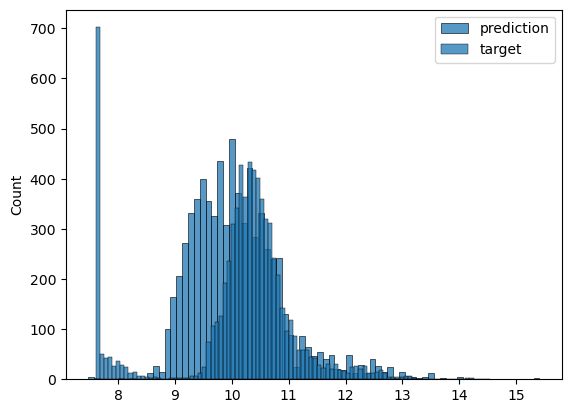

In [23]:
sns.histplot(y_pred, label='prediction')
sns.histplot(y_train, label='target')
plt.legend()

In [24]:
# implementation of rmse

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [25]:
rmse(y_train, y_pred)

0.7554192603920132

In [26]:
df_num = df_val[base]
df_num = df_num.fillna(0)
X_val = df_num.values

y_pred = w_0 + X_val.dot(w)

In [27]:
y_pred

array([ 9.86288014, 10.37013608,  9.69868129, ..., 10.4916625 ,
        9.57091361, 10.40022147])

In [28]:
rmse(y_val, y_pred)

0.7616530991301601

In [29]:
# fucntion for converting dataframe into a Matrix

def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [30]:
df_train['age'] = 2017 - df_train.year

In [31]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [32]:

features = []

for v in [2, 3, 4]:
    feature = 'num_doors_%s' % v
    value =(df['number_of_doors'] == v).astype(int)
    df[feature] = value
    features.append(feature)
    
#     (df['number_of_doors'] == v).astype(int)

In [33]:
df['make'].value_counts().head()

chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
Name: make, dtype: int64

In [34]:
for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
    feature = 'is_make_%s' % v
    df[feature] = (df['make'] == v).astype(int)
    features.append(feature)

In [49]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)
    
    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)
        
    for v in ['regular_unleaded', 'premium_unleaded_(required)','premium_unleaded_(recommended)',
              'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)

    for v in ['automatic', 'manual', 'automated_manual']:
        feature = 'is_transmission_%s' % v
        df[feature] = (df['transmission_type'] == v).astype(int)
        features.append(feature)
        
    for v in ['front_wheel_drive', 'rear_wheel_drive',
        'all_wheel_drive', 'four_wheel_drive']:
        feature = 'is_driven_wheels_%s' % v
        df[feature] = (df['driven_wheels'] == v).astype(int)
        features.append(feature)

    for v in ['crossover', 'flex_fuel', 'luxury',
        'luxury,performance', 'hatchback']:
        feature = 'is_mc_%s' % v
        df[feature] = (df['market_category'] == v).astype(int)
        features.append(feature)
        
    for v in ['compact', 'midsize', 'large']:
        feature = 'is_size_%s' % v
        df[feature] = (df['vehicle_size'] == v).astype(int)
        features.append(feature)

    for v in ['sedan', '4dr_suv', 'coupe', 'convertible', '4dr_hatchback']:
        feature = 'is_style_%s' % v
        df[feature] = (df['vehicle_style'] == v).astype(int)
        features.append(feature)
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [50]:
X_train = prepare_X(df_train)
w_0, w = trainLinearRegression(X_train, y_train)

In [51]:
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

validation: 812.2507593477233


In [52]:
# linear regression with regularization

def trainLinearRegression(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg
    
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [54]:
for r in [0, 0.001, 0.01, 0.1, 1, 10]:
    w_0, w = trainLinearRegression(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, rmse(y_val, y_pred))

     0 812.2507593477233
 0.001 0.4602267626604366
  0.01 0.4602394963261015
   0.1 0.46037006958136023
     1 0.461829804265389
    10 0.47572481006935247


In [55]:
X_train = prepare_X(df_train)
w_0, w = trainLinearRegression(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
print('test:', rmse(y_test, y_pred))

validation: 0.4602394963261015
test: 0.45718136796896486


In [57]:
ad = {
'city_mpg': 18,
'driven_wheels': 'all_wheel_drive',
'engine_cylinders': 6.0,
'engine_fuel_type': 'regular_unleaded',
'engine_hp': 268.0,
'highway_mpg': 25,
'make': 'toyota',
'market_category': 'crossover,performance',
'model': 'venza',
'number_of_doors': 4.0,
'popularity': 2031,
'transmission_type': 'automatic',
'vehicle_size': 'midsize',
'vehicle_style': 'wagon',
'year': 2013
}

In [58]:
df_test = pd.DataFrame([ad])
X_test = prepare_X(df_test)

In [59]:
y_pred = w_0 + X_test.dot(w)

In [60]:
suggestion = np.expm1(y_pred)
suggestion

array([28294.13591276])